In [271]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor

## Data Generation

In [272]:


def generate_coloring(N):
    """Generate a random 2-coloring for integers from 1 to N."""
    colors = ['blue', 'red']
    return [random.choice(colors) for _ in range(N)]

def generate_sample_dataset(num_samples, N, batch_size=1000):
    """Generate a sample dataset of colorings."""
    dataset = []
    batches = num_samples // batch_size
    remainder = num_samples % batch_size
    for _ in range(batches):
        batch = [generate_coloring(N) for _ in range(batch_size)]
        dataset.extend(batch)
    if remainder:
        dataset.extend([generate_coloring(N) for _ in range(remainder)])
    return dataset


num_samples = 50000
N = 100 # Maximum integer value to be colored
sample_dataset = generate_sample_dataset(num_samples, N)

# first 5 colorings in the dataset
for i in range(10):
    print(f"Sample {i + 1}: {sample_dataset[i]}")

Sample 1: ['blue', 'blue', 'red', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'red', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'red', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'red', 'blue', 'red', 'red', 'blue', 'red', 'red', 'red', 'red', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'red', 'red', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'red', 'blue', 'red', 'blue']
Sample 2: ['blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'bl

## Fractions of Monochromatic Arithmetic Triples

In [273]:
def monochromatic_triplets_fraction(colors):
    """Calculate the fraction of monochromatic arithmetic progressions of length 3."""
    n = len(colors)
    monochromatic_ap = 0
    total_ap = 0
    
    # Iterate over all possible triplets (i, j, k) that form an arithmetic progression
    for i in range(n):
        for j in range(i + 1, n):
            diff = j - i
            k = j + diff
            if k < n:
                #print(f"Indices: ({i}, {j}, {k}) -> Colors: ({colors[i]}, {colors[j]}, {colors[k]})")
                total_ap += 1
                if colors[i] == colors[j] == colors[k]:
                    monochromatic_ap += 1
    
    # Calculate the fraction
    if total_ap != 0:
        fraction_monochromatic_ap = monochromatic_ap / total_ap
    else:
        fraction_monochromatic_ap = 0
    
    return fraction_monochromatic_ap

# Applying the function on the sample dataset
sample_monochromatic_triples_fractions = [monochromatic_triplets_fraction(colors) for colors in sample_dataset]

# Print calculated fractions
for i in range(5):
    print(f"Sample {i + 1}: Fraction of monochromatic triplets: {sample_monochromatic_triples_fractions[i]}")


Sample 1: Fraction of monochromatic triplets: 0.24693877551020407
Sample 2: Fraction of monochromatic triplets: 0.2951020408163265
Sample 3: Fraction of monochromatic triplets: 0.26326530612244897
Sample 4: Fraction of monochromatic triplets: 0.2510204081632653
Sample 5: Fraction of monochromatic triplets: 0.24081632653061225


In [274]:
df1 = pd.DataFrame({'sample_monochromatic_triples_fractions':sample_monochromatic_triples_fractions})

In [275]:
df1.head(5)

,sample_monochromatic_triples_fractions
0,0.246939
1,0.295102
2,0.263265
3,0.251020
4,0.240816


In [276]:
df1.describe()

,sample_monochromatic_triples_fractions
count,50000.000000
mean,0.250000
std,0.012648
min,0.228571
25%,0.241224
50%,0.246531
75%,0.254694
max,0.365306


## Fractions of Monochromatic quadruples (4,4)

In [277]:
def monochromatic_quadruples_fraction(colors):
    """Calculate the fraction of monochromatic arithmetic progressions of length 4."""
    n = len(colors)
    monochromatic_ap = 0
    total_ap = 0
    
    # Iterate over all possible quadruples (i, j, k, l) that form an arithmetic progression
    for i in range(n):
        for j in range(i + 1, n):
            diff = j - i
            k = j + diff
            l = k + diff
            if l < n:
               # print(f"Indices: ({i}, {j}, {k}, {l}) -> Colors: ({colors[i]}, {colors[j]}, {colors[k]}, {colors[l]})")
                total_ap += 1
                if colors[i] == colors[j] == colors[k] == colors[l]:
                    monochromatic_ap += 1
    
    # Calculate the fraction
    if total_ap != 0:
        fraction_monochromatic_ap = monochromatic_ap / total_ap
    else:
        fraction_monochromatic_ap = 0
    
    return fraction_monochromatic_ap

# Applying the function on the sample dataset
sample_monochromatic_quadruples_fractions = [monochromatic_quadruples_fraction(colors) for colors in sample_dataset]

# Print calculated fractions
for i in range(5):
    print(f"Sample {i + 1}: Fraction of monochromatic quadruples: {sample_monochromatic_quadruples_fractions[i]}")


Sample 1: Fraction of monochromatic quadruples: 0.1150278293135436
Sample 2: Fraction of monochromatic quadruples: 0.17068645640074212
Sample 3: Fraction of monochromatic quadruples: 0.14347557204700062
Sample 4: Fraction of monochromatic quadruples: 0.12863327149041434
Sample 5: Fraction of monochromatic quadruples: 0.11935683364254793


## Fractions of Monochromatic arithmetic quintuples (5,5)

In [278]:
def monochromatic_quintuples_fraction(colors):
    """Calculate the fraction of monochromatic arithmetic progressions of length 5."""
    n = len(colors)
    monochromatic_ap = 0
    total_ap = 0
    
    # Iterate over all possible quintuples (i, j, k, l, m) that form an arithmetic progression
    for i in range(n):
        for j in range(i + 1, n):
            diff = j - i
            k = j + diff
            l = k + diff
            m = l + diff
            if m < n:
                #print(f"Indices: ({i}, {j}, {k}, {l}, {m}) -> Colors: ({colors[i]}, {colors[j]}, {colors[k]}, {colors[l]}, {colors[m]})")
                total_ap += 1
                if colors[i] == colors[j] == colors[k] == colors[l] == colors[m]:
                    monochromatic_ap += 1
    
    # Calculate the fraction
    if total_ap != 0:
        fraction_monochromatic_ap = monochromatic_ap / total_ap
    else:
        fraction_monochromatic_ap = 0
    
    return fraction_monochromatic_ap

# Applying the function on the sample dataset
sample_monochromatic_quintuples_fractions = [monochromatic_quintuples_fraction(colors) for colors in sample_dataset]

# Print calculated fractions
for i in range(5):
    print(f"Sample {i + 1}: Fraction of monochromatic quintuples: {sample_monochromatic_quintuples_fractions[i]}")


Sample 1: Fraction of monochromatic quintuples: 0.059166666666666666
Sample 2: Fraction of monochromatic quintuples: 0.1
Sample 3: Fraction of monochromatic quintuples: 0.06833333333333333
Sample 4: Fraction of monochromatic quintuples: 0.06833333333333333
Sample 5: Fraction of monochromatic quintuples: 0.058333333333333334


## Monochromatic Sextuple (6,6)

In [279]:
def monochromatic_sextuples_fraction(colors):
    """Calculate the fraction of monochromatic arithmetic progressions of length 6."""
    n = len(colors)
    monochromatic_ap = 0
    total_ap = 0
    
    # Iterate over all possible sextuples (i, j, k, l, m, n) that form an arithmetic progression
    for i in range(n):
        for j in range(i + 1, n):
            diff = j - i
            k = j + diff
            l = k + diff
            m = l + diff
            o = m + diff
            if o < n:
                # print(f"Indices: ({i}, {j}, {k}, {l}, {m}, {o}) -> Colors: ({colors[i]}, {colors[j]}, {colors[k]}, {colors[l]}, {colors[m]}, {colors[o]})")
                total_ap += 1
                if colors[i] == colors[j] == colors[k] == colors[l] == colors[m] == colors[o]:
                    monochromatic_ap += 1
    
    # Calculate the fraction
    if total_ap != 0:
        fraction_monochromatic_ap = monochromatic_ap / total_ap
    else:
        fraction_monochromatic_ap = 0
    
    return fraction_monochromatic_ap


# Applying the function on the sample dataset
sample_monochromatic_sextuples_fractions = [monochromatic_sextuples_fraction(colors) for colors in sample_dataset]

# Print calculated fractions
for i in range(5):
    print(f"Sample {i + 1}: Fraction of monochromatic sextuples: {sample_monochromatic_sextuples_fractions[i]}")


Sample 1: Fraction of monochromatic sextuples: 0.031578947368421054
Sample 2: Fraction of monochromatic sextuples: 0.05578947368421053
Sample 3: Fraction of monochromatic sextuples: 0.03263157894736842
Sample 4: Fraction of monochromatic sextuples: 0.029473684210526315
Sample 5: Fraction of monochromatic sextuples: 0.029473684210526315


In [280]:
np.mean(sample_monochromatic_sextuples_fractions)

0.03131970526315789

## Monochromatic septuples (7,7)

In [281]:
def monochromatic_septuples_fraction(colors):
    """Calculate the fraction of monochromatic arithmetic progressions of length 7."""
    n = len(colors)
    monochromatic_ap = 0
    total_ap = 0
    
    # Iterate over all possible septuples (i, j, k, l, m, o, p) that form an arithmetic progression
    for i in range(n):
        for j in range(i + 1, n):
            diff = j - i
            k = j + diff
            l = k + diff
            m = l + diff
            o = m + diff
            p = o + diff
            if p < n:
                total_ap += 1
                if colors[i] == colors[j] == colors[k] == colors[l] == colors[m] == colors[o] == colors[p]:
                    monochromatic_ap += 1
    
    # Calculate the fraction
    if total_ap != 0:
        fraction_monochromatic_ap = monochromatic_ap / total_ap
    else:
        fraction_monochromatic_ap = 0
    
    return fraction_monochromatic_ap

# Applying the function on the sample dataset
sample_monochromatic_septuples_fractions = [monochromatic_septuples_fraction(colors) for colors in sample_dataset]

# Print calculated fractions
for i in range(5):
    print(f"Sample {i + 1}: Fraction of monochromatic septuples: {sample_monochromatic_septuples_fractions[i]}")


Sample 1: Fraction of monochromatic septuples: 0.021683673469387755
Sample 2: Fraction of monochromatic septuples: 0.030612244897959183
Sample 3: Fraction of monochromatic septuples: 0.017857142857142856
Sample 4: Fraction of monochromatic septuples: 0.015306122448979591
Sample 5: Fraction of monochromatic septuples: 0.01403061224489796


In [282]:
np.mean(sample_monochromatic_septuples_fractions)

0.015681147959183673

## Anti-Symmetry

In [283]:
def anti_symmetry(colors):
    """Calculate the fraction of opposite elements with different colors."""
    n = len(colors)
    num_opposite_different_colors = 0
    total_opposite_pairs = n // 2  # Total number of opposite pairs
    
    for i in range(total_opposite_pairs):
        if colors[i] != colors[n - 1 - i]:  # Check if opposite elements have different colors
            num_opposite_different_colors += 1
    
    # Calculate the fraction
    if total_opposite_pairs != 0:
        fraction_anti_symmetry = num_opposite_different_colors / total_opposite_pairs
    else:
        fraction_anti_symmetry = 0
    
    return fraction_anti_symmetry


# Applying the function on the sample dataset
sample_anti_symmetry = [anti_symmetry(colors) for colors in sample_dataset]

# Print first 5 calculated fractions
for i in range(min(5, len(sample_anti_symmetry))):
    print(f"Sample {i + 1}: {sample_anti_symmetry[i]:.4f}")


Sample 1: 0.5200
Sample 2: 0.5400
Sample 3: 0.5200
Sample 4: 0.4600
Sample 5: 0.4800


## Proportions of more popular color

In [284]:

def calculate_proportion_more_popular_color(colors):
    """Calculate the proportion of the more popular color."""
    # Count occurrences of each color
    counts = {color: colors.count(color) for color in set(colors)}
    
    # Determine the more popular color
    more_popular_color = max(counts, key=counts.get)
    
    # Calculate proportion of the more popular color
    proportion_more_popular_color = counts[more_popular_color] / len(colors)
    
    return proportion_more_popular_color, more_popular_color

# Applying the function on the sample dataset
sample_proportions = [calculate_proportion_more_popular_color(colors) for colors in sample_dataset]

# first 5 calculated proportions and corresponding colors
for i in range(5):
    proportion, color = sample_proportions[i]
    print(f"Sample {i + 1}: Proportion of the more popular color: {proportion}, The more popular color is: {color}")

Sample 1: Proportion of the more popular color: 0.52, The more popular color is: red
Sample 2: Proportion of the more popular color: 0.63, The more popular color is: blue
Sample 3: Proportion of the more popular color: 0.6, The more popular color is: red
Sample 4: Proportion of the more popular color: 0.53, The more popular color is: red
Sample 5: Proportion of the more popular color: 0.52, The more popular color is: blue


In [285]:
# Extracting only the proportions from the sample_proportions
sample_popular_proportions_only = [proportions for proportions, _ in sample_proportions]

# first 5 calculated proportions
for i in range(5):
    print(f"Sample {i + 1}: Proportion of the more popular color: {sample_popular_proportions_only[i]}")

Sample 1: Proportion of the more popular color: 0.52
Sample 2: Proportion of the more popular color: 0.63
Sample 3: Proportion of the more popular color: 0.6
Sample 4: Proportion of the more popular color: 0.53
Sample 5: Proportion of the more popular color: 0.52


## Transition Frequency

In [286]:
def calculate_color_transition_frequency(colors):
    """Calculate the frequency of transitions between different colors."""
    transitions = 0
    for i in range(1, len(colors)):
        if colors[i] != colors[i - 1]:
            transitions += 1
    return transitions/200

In [287]:
# Applying the function on the sample dataset
color_transition = [calculate_color_transition_frequency(colors) for colors in sample_dataset]

# first 5 calculated transition frequencies
for i in range(5):
    print(f"Sample {i + 1}: Transition frequency: {color_transition[i]}")


Sample 1: Transition frequency: 0.24
Sample 2: Transition frequency: 0.205
Sample 3: Transition frequency: 0.175
Sample 4: Transition frequency: 0.185
Sample 5: Transition frequency: 0.23


## Blockiness: Longest block

In [288]:
def blockiness(colors):
    """Calculate the blockiness of the coloring."""
    block_count = 0  # Initialize block count
    max_block_length = 0  # Initialize maximum block length
    current_block_length = 0  # Initialize current block length
    prev_color = None  # Initialize previous color tracker

    for color in colors:
        if color == prev_color:
            current_block_length += 1  # Increment current block length if the same color continues
        else:
            if current_block_length > max_block_length:
                max_block_length = current_block_length  # Update maximum block length if current block is longer
            current_block_length = 1  # Reset current block length for a new color block
            block_count += 1  # Increment block count
            prev_color = color  # Update previous color to current color

    # Check the last block
    if current_block_length > max_block_length:
        max_block_length = current_block_length  # Update maximum block length if the last block is the longest

    # Calculate blockiness as the ratio of the longest block length to the total number of colors
    return max_block_length / len(colors)

# Calculate blockiness for each coloring sequence in the sample dataset
blockiness_values = [blockiness(colors) for colors in sample_dataset]

# Print the first 5 blockiness values
for i in range(5):
    print(f"Sample {i + 1}: Blockiness: {blockiness_values[i]}")


Sample 1: Blockiness: 0.11
Sample 2: Blockiness: 0.07
Sample 3: Blockiness: 0.08
Sample 4: Blockiness: 0.07
Sample 5: Blockiness: 0.09


## Proportions of Red and Blue

In [289]:
def proportion_of_color(colors, color):
    """Calculate the proportion of a specific color in the coloring."""
    count = colors.count(color)
    total = len(colors)
    return count / total if total > 0 else 0

def proportion_of_blue(colors):
    return proportion_of_color(colors, 'blue')

def proportion_of_red(colors):
    return proportion_of_color(colors, 'red')

# Applying the functions to the sample dataset
proportion_blue = [proportion_of_blue(colors) for colors in sample_dataset]
proportion_red = [proportion_of_red(colors) for colors in sample_dataset]

# Print first 5 calculated proportions for each color
print("Proportion of Blue:")
for i in range(5):
    print(f"Sample {i + 1}: {proportion_blue[i]}")

print("\nProportion of Red:")
for i in range(5):
    print(f"Sample {i + 1}: {proportion_red[i]}")

Proportion of Blue:
Sample 1: 0.48
Sample 2: 0.63
Sample 3: 0.4
Sample 4: 0.47
Sample 5: 0.52

Proportion of Red:
Sample 1: 0.52
Sample 2: 0.37
Sample 3: 0.6
Sample 4: 0.53
Sample 5: 0.48


## Length Training Data

In [290]:
#length train
length = [3] * 100000 

## Length Test Set

In [291]:
# # length_test
# length_test = [7]*50000

## DataFrame

In [292]:
test_data7 = pd.DataFrame(
{
'anti_symmetry':sample_anti_symmetry,
'proportion_blue':proportion_blue,
'proportion_red':proportion_red,
'blockiness_values':blockiness_values,
'transition_frequency':color_transition,
'popular_proportions':sample_popular_proportions_only,
'length': [7] * 50000 
}
)

## Squared distances Weighting

In [293]:
# Calculate the mean for each column
means = test_data7[['transition_frequency', 'anti_symmetry']].mean()

# Calculate the deviation from the mean
test_data7['transition_frequency_deviation'] = test_data7['transition_frequency'] - means['transition_frequency']
test_data7['anti_symmetry_deviation'] = test_data7['anti_symmetry'] - means['anti_symmetry']


In [294]:
test_data7.shape

(50000, 9)

In [295]:
fractions = pd.DataFrame({'fractions':sample_monochromatic_septuples_fractions})

In [300]:
fractions.mean()

fractions    0.015681
dtype: float64

In [301]:
1/(2**(7-1))

0.015625

## Combined training data

In [296]:
test_data7 = pd.concat([test_data7, fractions], axis=1)

In [297]:
test_data7.head()

,anti_symmetry,proportion_blue,proportion_red,blockiness_values,transition_frequency,popular_proportions,length,transition_frequency_deviation,anti_symmetry_deviation,fractions
0,0.52,0.48,0.52,0.11,0.240,0.52,7,-0.007404,0.02041,0.021684
1,0.54,0.63,0.37,0.07,0.205,0.63,7,-0.042404,0.04041,0.030612
2,0.52,0.40,0.60,0.08,0.175,0.60,7,-0.072404,0.02041,0.017857
3,0.46,0.47,0.53,0.07,0.185,0.53,7,-0.062404,-0.03959,0.015306
4,0.48,0.52,0.48,0.09,0.230,0.52,7,-0.017404,-0.01959,0.014031


In [298]:
test_data7.to_csv('test_data7.csv')

## Monochromatic Arithmetic Progressions Visual

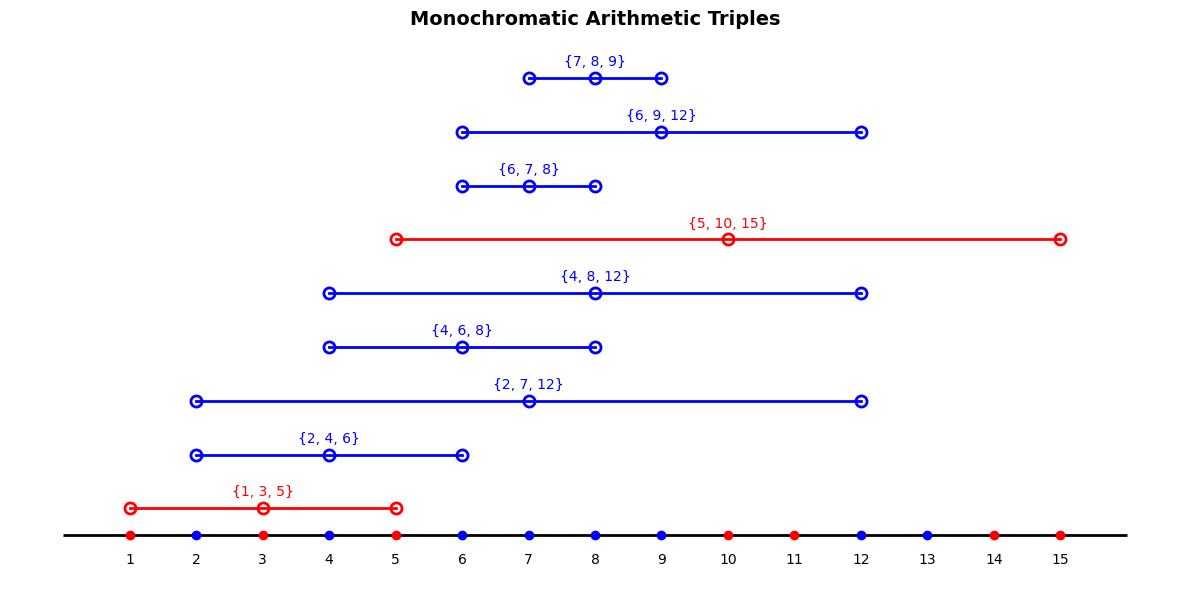

In [14]:
n = 15  
colors = ['red', 'blue']  # Possible colors

# Randomly assign colors to integers with balanced probability for red and blue
color_assignment = {x: random.choice(colors) for x in range(1, n + 1)}

# Find all monochromatic arithmetic triples
def find_monochromatic_triples(color_assignment):
    triples = []
    for a in range(1, n + 1):
        for d in range(1, (n - a) // 2 + 1):
            b = a + d
            c = b + d
            if c > n:
                break
            if color_assignment[a] == color_assignment[b] == color_assignment[c]:
                triples.append((a, b, c, color_assignment[a]))
    return triples

# Find monochromatic triples
triples = find_monochromatic_triples(color_assignment)

# Plot the number line
fig, ax = plt.subplots(figsize=(12, 6))

# Draw the number line
ax.hlines(0, 0, n + 1, colors='black', lw=2)

# Plot the integers and their colors 
for x in range(1, n + 1):
    color = color_assignment[x]
    ax.plot(x, 0, 'o', markersize=6, color=color)
    ax.text(x, -0.2, str(x), ha='center', va='top', fontsize=10)

# Adjust y-positions dynamically
y_positions = {}
y_offset = 0.3  
for a, b, c, color in triples:
    # Determine y-position for the label to avoid overlap
    y_pos = y_offset
    while any(abs(y_pos - prev_y) < 0.4 for prev_y in y_positions.values()):
        y_pos += 0.5  # Increase space between lines for more room
    y_positions[(a, b, c)] = y_pos
    
    # Draw a line connecting the triple
    ax.plot([a, b, c], [y_pos, y_pos, y_pos], color=color, lw=2)
    
    # Highlight the points
    for x in [a, b, c]:
        ax.plot(x, y_pos, 'o', markersize=8, color=color, fillstyle='none', markeredgewidth=2)

    # Add a label above the timeline
    ax.text(b, y_pos + 0.1, f'{{{a}, {b}, {c}}}', ha='center', va='bottom', fontsize=10, color=color)
    
    # Increase y_offset for next set
    y_offset = y_pos + 0.6  

ax.set_title("Monochromatic Arithmetic Triples", fontsize=14, fontweight='bold')
ax.set_xlabel("Integer Value", fontsize=12)
ax.set_ylabel("Triples and their Corresponding Colors", fontsize=12)

ax.set_ylim(-0.5, max(y_positions.values()) + 0.5 if y_positions else 0.5)
ax.axis('off')

# Show the plot
plt.tight_layout()
plt.show()
